In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy import stats as st
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

df = pd.read_csv('Mall.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
le = preprocessing.LabelEncoder()
df['Genre']= le.fit_transform(df['Genre'])
df['Genre'] 

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int32

### 0 is female , 1 is male

In [5]:
pd.crosstab(df.Genre,df['Annual Income (k$)'],margins=True)

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,...,97,98,99,101,103,113,120,126,137,All
Genre,,,,,,,,,,,,,,,,,,,,,
0,0,2,2,2,2,2,1,1,0,1,...,2,1,1,1,4,1,2,1,0,112
1,2,0,0,0,2,2,1,1,2,1,...,0,1,1,1,0,1,0,1,2,88
All,2,2,2,2,4,4,2,2,2,2,...,2,2,2,2,4,2,2,2,2,200


In [6]:
pd.crosstab(df.Genre,df['Spending Score (1-100)'],margins=True)

Spending Score (1-100),1,3,4,5,6,7,8,9,10,11,...,90,91,92,93,94,95,97,98,99,All
Genre,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,2,1,0,0,0,0,...,0,1,0,1,1,1,0,1,1,112
1,2,1,2,2,0,0,1,1,2,1,...,2,1,3,1,0,1,2,0,0,88
All,2,1,2,4,2,1,1,1,2,1,...,2,2,3,2,1,2,2,1,1,200


<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

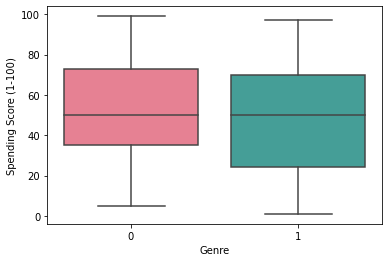

In [7]:
sns.boxplot(x="Genre", y="Spending Score (1-100)", palette="husl", data=df)

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

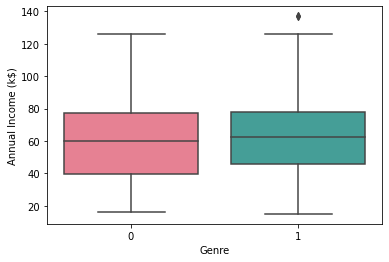

In [8]:
sns.boxplot(x="Genre", y="Annual Income (k$)", palette="husl", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

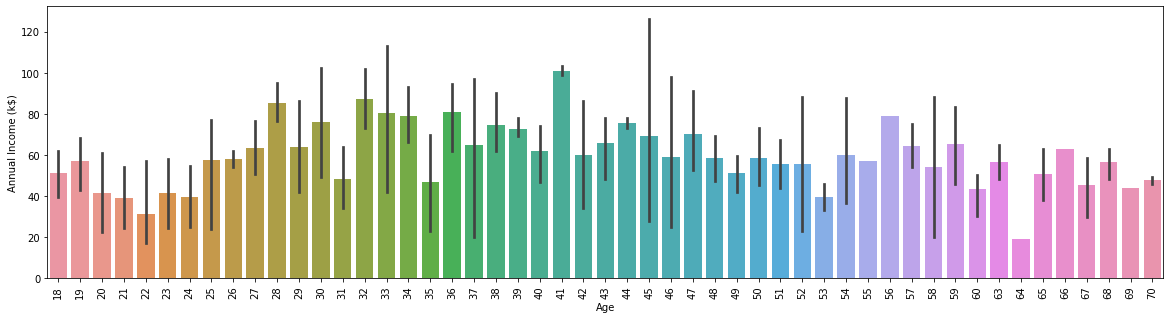

In [9]:
plt.figure(figsize = (20,5))
sns.barplot(df['Age'],df['Annual Income (k$)'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

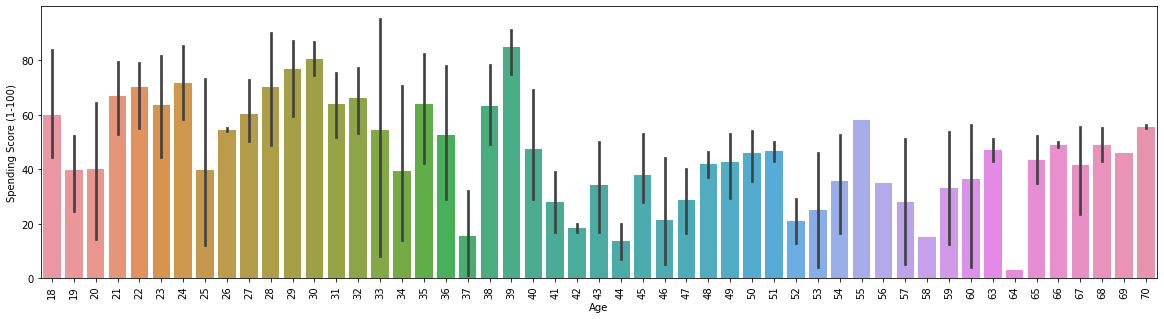

In [10]:
plt.figure(figsize = (20,5))
sns.barplot(df['Age'],df['Spending Score (1-100)'])
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

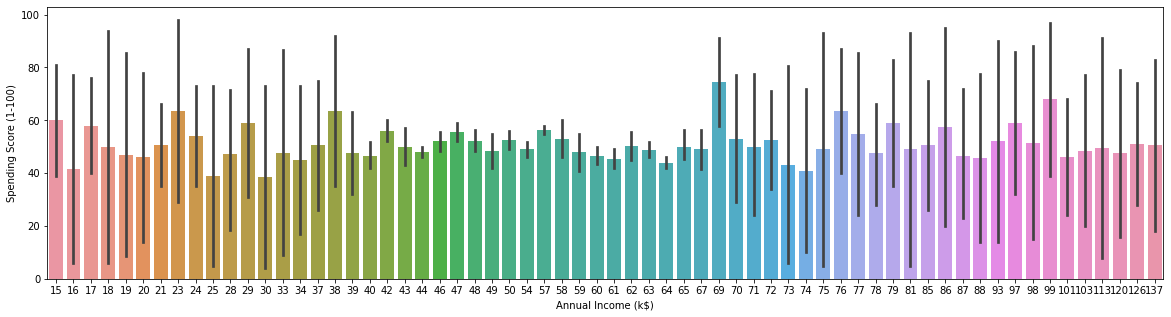

In [11]:
plt.figure(figsize = (20,5))
sns.barplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [12]:
from scipy.stats import chi2

df_new =pd.DataFrame(df,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])

def mahalnobis(x=None, data=None, cov=None):
    a= x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    b=np.linalg.inv(cov)
    left=np.dot(a,b)
    m=np.dot(left,a.T)
    return m.diagonal()

df_new['mahalnobis'] = mahalnobis(x=df_new,data=df_new[['Age','Annual Income (k$)','Spending Score (1-100)']])
print(df_new.head())

   Age  Annual Income (k$)  Spending Score (1-100)  mahalnobis
0   19                  15                      39    5.974200
1   21                  15                      81    5.387335
2   20                  16                       6    9.900938
3   23                  16                      77    4.726772
4   31                  17                      40    3.452776


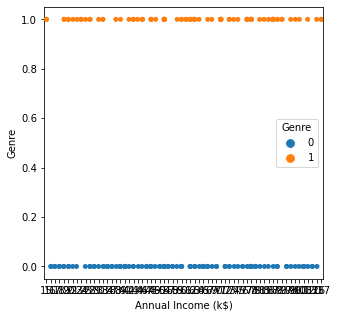

In [13]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="Annual Income (k$)", y="Genre" , data=df, hue="Genre")
plt.show()

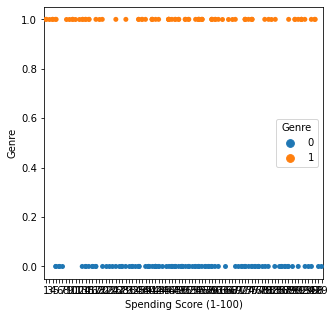

In [14]:
plt.subplots(figsize=(5,5))
sns.stripplot(x="Spending Score (1-100)", y="Genre" , data=df, hue="Genre")
plt.show()

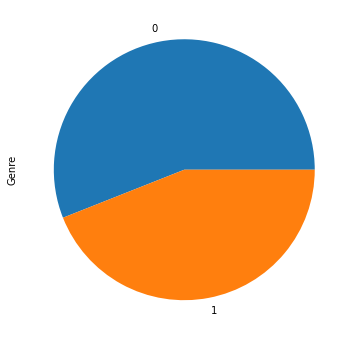

In [15]:
plt.subplots(1,1,figsize=(6,6))
df['Genre'].value_counts().plot.pie()
plt.show()

<AxesSubplot:>

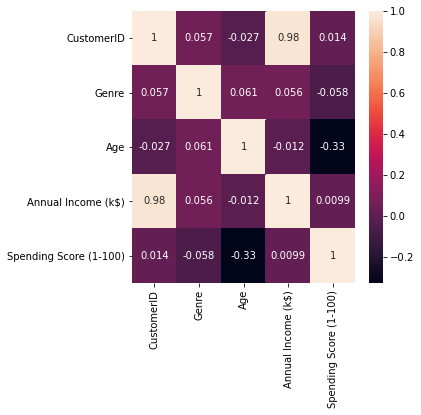

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax)

In [17]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

le = preprocessing.LabelEncoder()
df['Genre']= le.fit_transform(df['Genre'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
